In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [19]:
df= pd.read_csv('heart.csv')

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defec


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
columns_changed=['age','trestbps','chol','thalach','oldpeak']

In [22]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy before scaling and transforming into normal distribution:", accuracy_score(y_test, y_pred))

Accuracy before scaling and transforming into normal distribution: 0.8446601941747572


In [23]:
pt = PowerTransformer(method='yeo-johnson')

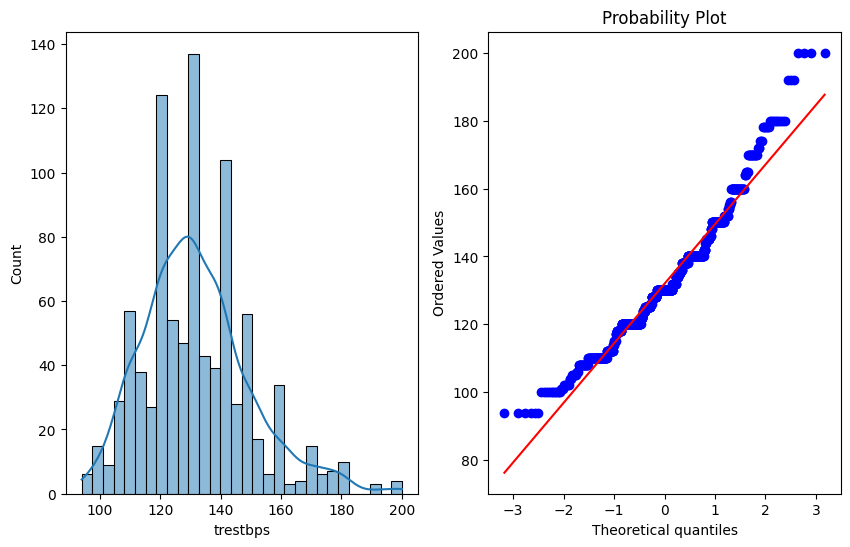

In [24]:
def plot_data(X_train, column):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column], bins=30, edgecolor='black',kde=True)
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[column], dist="norm", plot=plt)
    plt.show()

plot_data(X_train, 'trestbps')
# plot_data(X_train,'chol')

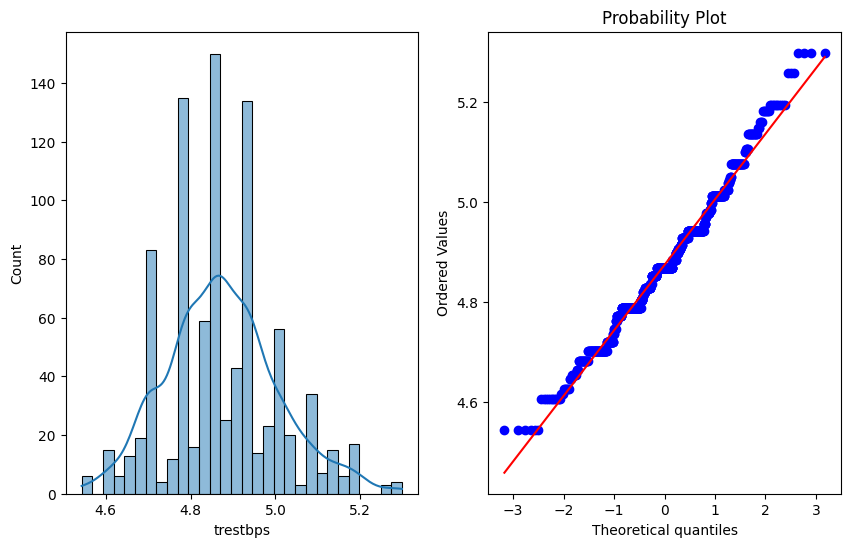

In [25]:
X_train['trestbps']=np.log(X_train['trestbps'])
X_test['trestbps']=np.log(X_test['trestbps'])
plot_data(X_train, 'trestbps')

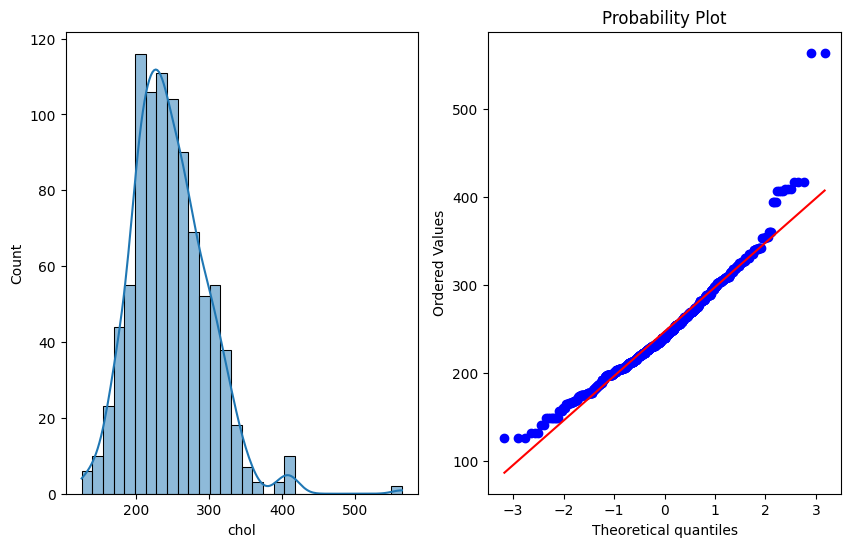

In [26]:
plot_data(X_train, 'chol')

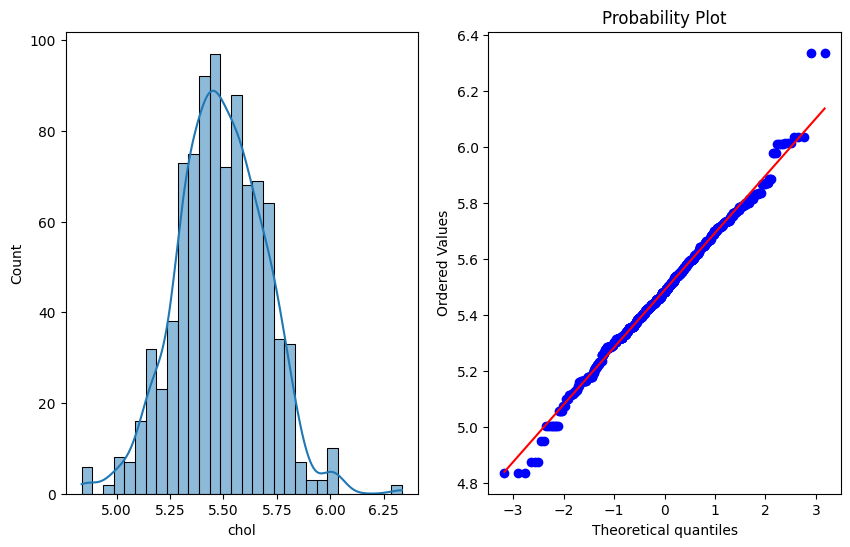

In [27]:
X_train['chol']=np.log(X_train['chol'])
X_test['chol']=np.log(X_test['chol'])
plot_data(X_train, 'chol')

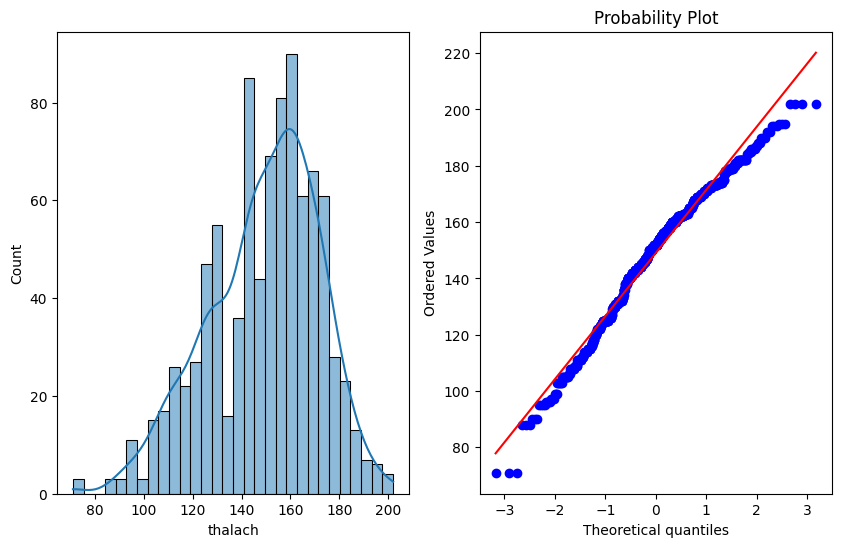

In [28]:
plot_data(X_train,'thalach')

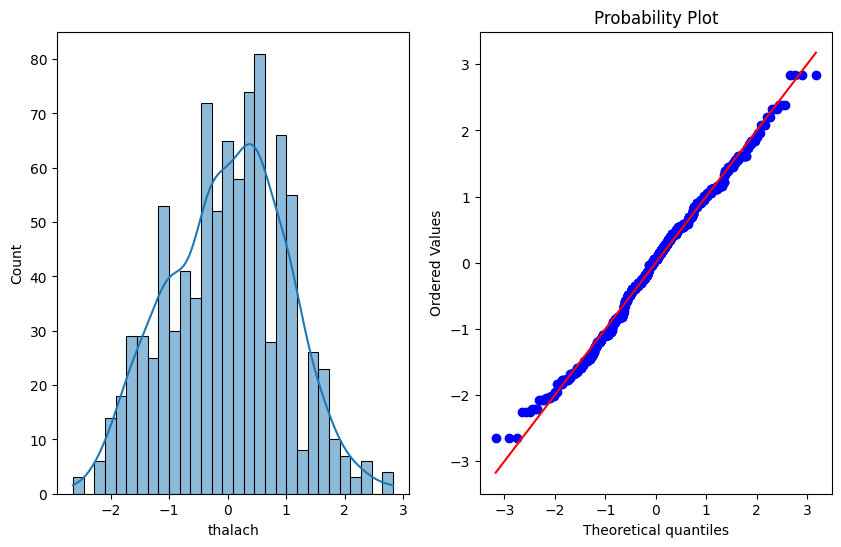

In [ ]:
pt.fit(X_train[['thalach']])
X_train['thalach']=pt.fit_transform(X_train[['thalach']])
X_test['thalach']=pt.transform(X_test[['thalach']])
plot_data(X_train,'thalach')

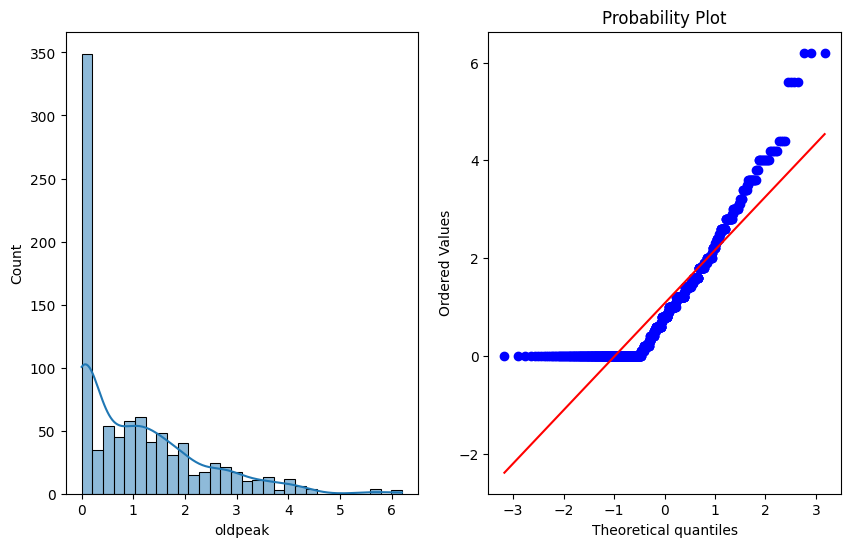

In [30]:
plot_data(X_train,'oldpeak')

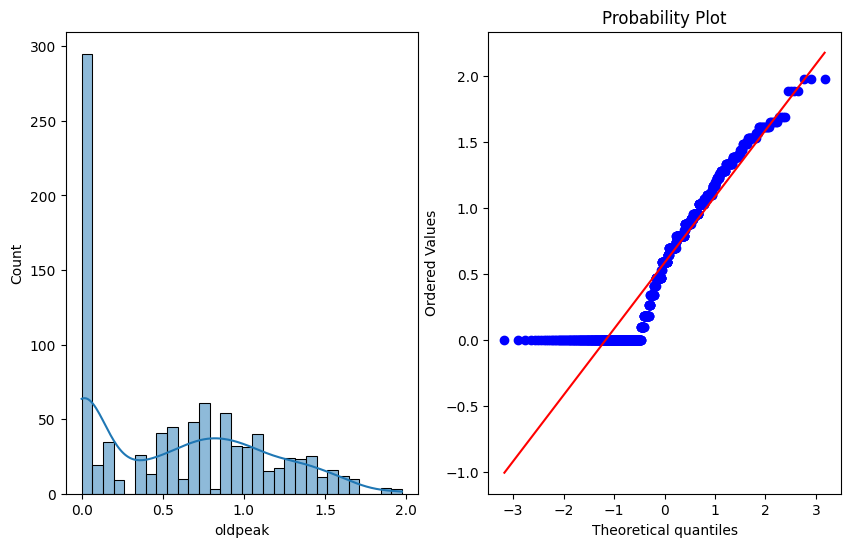

In [31]:
# data_reshaped = X_train['oldpeak'].values.reshape(-1, 1)
# X_traintrain['oldpeak_change'] = pt.fit_transform(data_reshaped)
# pt.fit(X_traintraintraintrain[columns_changed])
# X_train[columns_changed] = pt.transform(X_traintrain[columns_changed])
# plot_data(X_traintrain,'thalach')
# pt.fit(X_train[['oldpeak']])
# X_traintrain['oldpeak']=pt.transform(X_train[['oldpeak']])
X_train['oldpeak']=np.log1p(X_train['oldpeak'])
X_test['oldpeak']=np.log1p(X_test['oldpeak'])
plot_data(X_train,'oldpeak')

In [33]:
# X_copy=df.drop('target', axis=1)
# y_copy=df['target']
# X_train_transformed,X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_copy, y_copy, test_size=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred_transformed = model.predict(X_test)
print("Accuracy (transformed):", accuracy_score(y_test, y_pred_transformed))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy (transformed): 0.8640776699029126

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        50
           1       0.80      0.92      0.86        53

    accuracy                           0.84       103
   macro avg       0.85      0.84      0.84       103
weighted avg       0.85      0.84      0.84       103



for models like logistic regression normal distribution is important, but scaling it afterwards may screw the normal distribution created hence decrease in accuracy

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled))

Accuracy (scaled): 0.8446601941747572

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        50
           1       0.80      0.92      0.86        53

    accuracy                           0.84       103
   macro avg       0.85      0.84      0.84       103
weighted avg       0.85      0.84      0.84       103



In [35]:
mmscaler = MinMaxScaler()
X_train_scaled = mmscaler.fit_transform(X_train)
X_test_scaled = mmscaler.transform(X_test)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print("Accuracy (normalised):", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled))

Accuracy (normalised): 0.8349514563106796

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        50
           1       0.80      0.91      0.85        53

    accuracy                           0.83       103
   macro avg       0.84      0.83      0.83       103
weighted avg       0.84      0.83      0.83       103

